# Homework 2
## Instructions

Your HW submission should consist of **one pdf or HTML file** exported from the Jupyter Notebook containing the answers to all the
questions included in the homework.

You will use Jupyter Notebook exclusively for this homework. All the cells in this notebook is editable. You need to edit, insert `markdown` and `code` cells to complete the homework.

> If you are running this notebook on MyBinder, be sure to download your notebook, otherwise all your progress will be lost. You will need to reupload your notebook to MyBinder next time to restore progress.

> If you are running this notebook locally on your own machine, you can simply save the notebook.

> AVOID writing all your codes in a single cell if there are multiple lines with meaningful outputs. Separate them and insert new cells as you see fit.

# Part 1 - Theoretical Concepts

## Q1. (0.5 points)

Assume you have the following universe of items:

`U = {sweater, shoes, socks, skirt}` and you have a dataset of transactions containing those items. Each item appears in at least one transaction.

You also know that `Conf({Shoes} -> {Socks}) = 1`

Then, it can only be the case that also `Conf({Socks} -> {Shoes}) = 1`. Is this statement True or False? You must explain your reasoning or you will lose points.

**ANSWER**:

# Input your answer here. Remember to change this cell to markdown
It is false. Confidence is directional. Althought in this dataset, the result of Conf({socks} -> {shoes}) is equal to result of Conf({shoes} -> {socks}). But it has a very different process of manipulation. 
Assume {shoes} is X, {socks} is Y, we have:
Conf({shoes} -> {socks}) = σ(X → Y)/ σ(X) = 1
Conf({socks} -> {shoes}) = σ(Y → X) / σ(Y) = 1


## Q2. (0.5 points)

Assume that you have a dataset of transactions for a clothing and shoes store and you find that the association rule `{shoes}->{socks}` has a confidence of 60% and a support percentage of 50%. You also know that the entire dataset is composed by 3000 transactions.

Find the number of transactions in which the item shoes appear.

You can round your answer to the nearest integer (so if your answer is `54.178`, it becomes `54`).

You must explain your answer and write down your calculations or you will lose points. You can do your calculations on a piece of paper and then take a picture and attach it to the submission as a separate file (e.g. `Q2.jpg`). We need to be able to clearly read your calculations/answers. If we cannot read what you write, you will lose points.

**ANSWER:**

In [ ]:
# Input your answer here. Remember to change this cell to markdown

# Q3 (3 points)
Consider the following dataset with 5 transactions.

| Transactions | Items                                    |
|--------------|------------------------------------------|
| 1            | steak, hamburger, beer, bread            |
| 2            | coke, bread, hamburger, pickles, beer    |
| 3            | beer, mustard, bread, hamburger, pickles |
| 4            | hamburger, steak, juice                  |
| 5            | coke, mustard, beer, juice               |

1. (1.2 points) Assume a `min_supp` threshold of 60%. Find all the frequent items-sets. You must show all your calculations and explain your reasoning or you will lose points.

**ANSWER:**

# Input your answer here. Remember to change this cell to markdown.
Total support count of each item: Steak: 2, Hamburger: 4, Beer: 4, Bread: 3, Coke: 2, Pickles: 2, Mustard: 2, Juice: 2.
Assume min_supp threshold is 60%, which means the support count of item is 5*60% = 3 would not be eliminated. The rest of the items will not be considered as frequent items-sets.
So, the item can be kept contains of: Hamburger, Beer, Bread.

2. (1.2 point) For a minconfidence of 70%, find all association rules of the form `{item1} -> {item2, item3}`.

You must show all your calculations and explain your reasoning or you will lose points.

**ANSWER:**

Conf({Hamburger} -> {Beer,Bread}) = σ({Hamburger,Beer,Bread})/ σ({Hamburger}) = 3/4 = 75%
Conf({Beer} -> {Hamburger,Bread}) = σ({Hamburger,Beer,Bread})/ σ({Beer}) = 3/4 = 75%
Conf({Bread} -> {Beer,Hamburger}) = σ({Hamburger,Beer,Bread})/ σ({Bread}) = 3/3 = 100%
We should keep three of these because they are all greater than 70%.

3. (0.6 points) Find the lift ratio for all the association rules you found in last question. Based on the confidence measure and lift measure, what do you conclude about the found association rules?

Lift(X → Y)= s(X → Y)/s(X)s(Y) 
Lift({Hamburger} -> {Beer,Bread}) = s({Hamburger,Beer,Bread})/s({Hamburger})s({Beer,Bread}) = 0.6/0.8x0.6 = 1.25
Lift({Beer} -> {Hamburger,Bread}) = s({Hamburger,Beer,Bread})/s({Beer})s({Hamburger,Bread}) = 0.6/0.8x0.6 = 1.25
Lift({Bread} -> {Beer,Hamburger}) = s({Hamburger,Beer,Bread})/s({Bread})s({Beer,Hamburger}) = 0.6/0.6x0.6 = 1.67
Customers will very likely to purchase hamburger, beer and bread together. 

# Part 2: Mining Association Rules from Data (6 points)

For this part of the homework you need to analyze the dataset `movies_binary.csv` containing data about movies watched by different individuals. The data is in binary format, where each column represents one movie. Each row can be thought of as capturing the collection of movies watched by a given individual, where a value of `1` indicates that the individual watched the corresponding movie and a value of `0` indicates that the individual did not watch the corresponding movie.

Starting from here, you will need to use R.

1. (0.5) Load the dataset movies_binary.csv, following the steps to convert a binary dataset into a transactions dataset; find out the total number and the names of the unique movies existing in the dataset.

In [16]:
# your code here
library("arules")
movie_binary <- read.csv("movies_binary.csv")
movie_matrix <- as.matrix(movie_binary)
movie_watch <- as(movie_matrix, "transactions")
itemInfo(movie_watch)


labels
Warrior.2011.
Departed.The.2006.
Fracture.2007.
MyBestFriend.sWedding.1997.
Interstellar.2014.
JohnWick.2014.
StarWars.EpisodeIV.ANewHope.1977.
StarWars.EpisodeV.TheEmpireStrikesBack.1980.
PulpFiction.1994.
HarryPotterandtheSorcererStone.2001.


2. (0.5) Plot the support percentage of the top 8 movies. Your plot should have a proper title, proper y-axis limits and be filled with a color of your choice. Which are the top 2 movies?

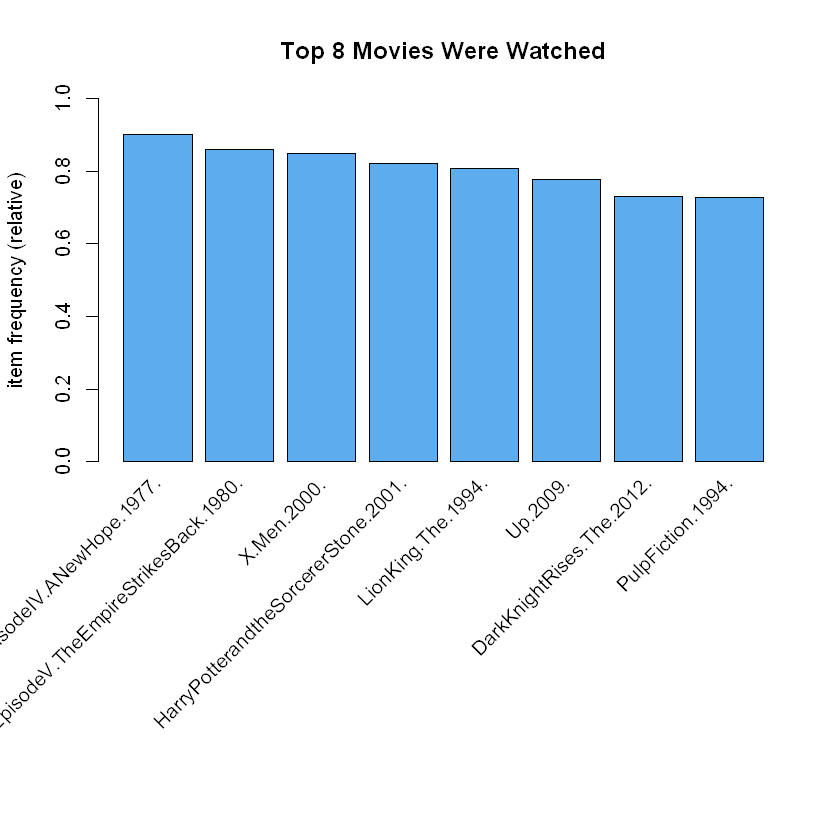

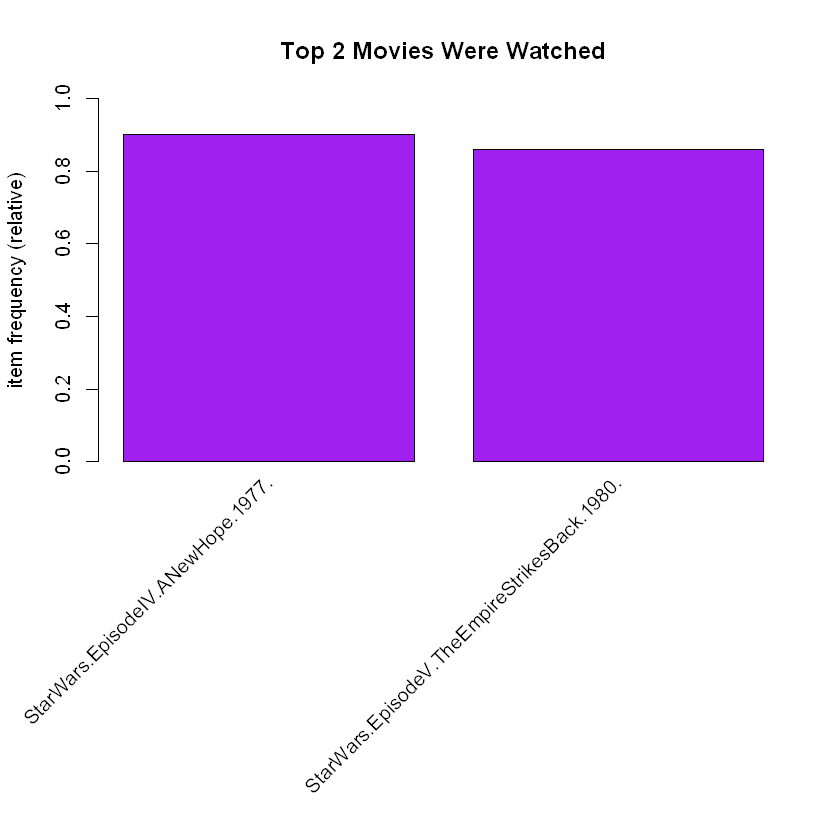

In [19]:
itemFrequencyPlot(movie_watch, ylim = c(0, 1), main = "Top 8 Movies Were Watched", col = "steelblue2", topN = 8)
#Top 2 movies are: star wars episode iv - a new hope and star wars episode v - the empire strikes back.
itemFrequencyPlot(movie_watch, ylim = c(0, 1), main = "Top 2 Movies Were Watched", col = "purple", topN = 2)

3. (0.5) Use the subset function to find out how many transactions contain both `Up.2009.` and `LionKing.The.1994.`

In [22]:

subset(movie_watch, items %ain% c("Up.2009.", "LionKing.The.1994"))


ERROR: Error in items %ain% c("Up.2009.", "LionKing.The.1994"): table contains an unknown item label


4. (0.7) Use the Apriori algorithm and find all the association rules with `minsupp = 0.76` and `minconf = 0.7` and containing a minimum of 2 items and at most 3 items

(Hint: to set at most 3 items, use the option maxlen, that works exactly as minlen).

(For this question, simply copy and paste the code used to run the apriori algorithm)

In [5]:
movie_rules <- apriori(movie_watch, parameter = list(supp = 0.76, conf = 0.7, target = "rules", minlen = 2, maxlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.76      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 759 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[32 item(s), 999 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


5. (0.5) Inspect the rules found in last question (4) and report the rules found

In [6]:
inspect(movie_rules)

    lhs                                               rhs                                              support confidence  coverage     lift count
[1] {Up.2009.}                                     => {LionKing.The.1994.}                           0.7767768  1.0000000 0.7767768 1.237918   776
[2] {LionKing.The.1994.}                           => {Up.2009.}                                     0.7767768  0.9615861 0.8078078 1.237918   776
[3] {HarryPotterandtheSorcererStone.2001.}         => {StarWars.EpisodeIV.ANewHope.1977.}            0.7627628  0.9281364 0.8218218 1.031377   762
[4] {StarWars.EpisodeIV.ANewHope.1977.}            => {HarryPotterandtheSorcererStone.2001.}         0.7627628  0.8476085 0.8998999 1.031377   762
[5] {StarWars.EpisodeV.TheEmpireStrikesBack.1980.} => {StarWars.EpisodeIV.ANewHope.1977.}            0.8588589  1.0000000 0.8588589 1.111235   858
[6] {StarWars.EpisodeIV.ANewHope.1977.}            => {StarWars.EpisodeV.TheEmpireStrikesBack.1980.} 0.8588589  0.9543

6. (0.7) Order the rules in decreasing order by lift and report the rule (or rules) with the highest and lowest lift ratio: how do we interpret the results and what can we conclude about those rules?

In [7]:
inspect(sort(movie_rules, by = "lift"))
# The highest lift ratio is the relationship between the (Up.2009.) and (LionKing.The.1994.), which is 1.238. This lift ratio means, when people watch Up.2009, 
#they are 1.238 times more likely to watch LionKing.1994.When people watch StarWars.EpisodeIV.A New Hope, they are 1.111 times more likely to watch
#StarWars.EpisodeV.TheEmpireStrikesBack.When people watch Harry Potter and the SorcererStone, they are 1.031 times more likely to watch the movie of 
#StarWars.EpisodeIV.A New Hope. 

    lhs                                               rhs                                              support confidence  coverage     lift count
[1] {Up.2009.}                                     => {LionKing.The.1994.}                           0.7767768  1.0000000 0.7767768 1.237918   776
[2] {LionKing.The.1994.}                           => {Up.2009.}                                     0.7767768  0.9615861 0.8078078 1.237918   776
[3] {StarWars.EpisodeV.TheEmpireStrikesBack.1980.} => {StarWars.EpisodeIV.ANewHope.1977.}            0.8588589  1.0000000 0.8588589 1.111235   858
[4] {StarWars.EpisodeIV.ANewHope.1977.}            => {StarWars.EpisodeV.TheEmpireStrikesBack.1980.} 0.8588589  0.9543938 0.8998999 1.111235   858
[5] {HarryPotterandtheSorcererStone.2001.}         => {StarWars.EpisodeIV.ANewHope.1977.}            0.7627628  0.9281364 0.8218218 1.031377   762
[6] {StarWars.EpisodeIV.ANewHope.1977.}            => {HarryPotterandtheSorcererStone.2001.}         0.7627628  0.8476

7. (0.4) Use the package arulesViz to plot a graphical representation of the rules found by the Apriori algorithm. Briefly comment on what you see from the graph.

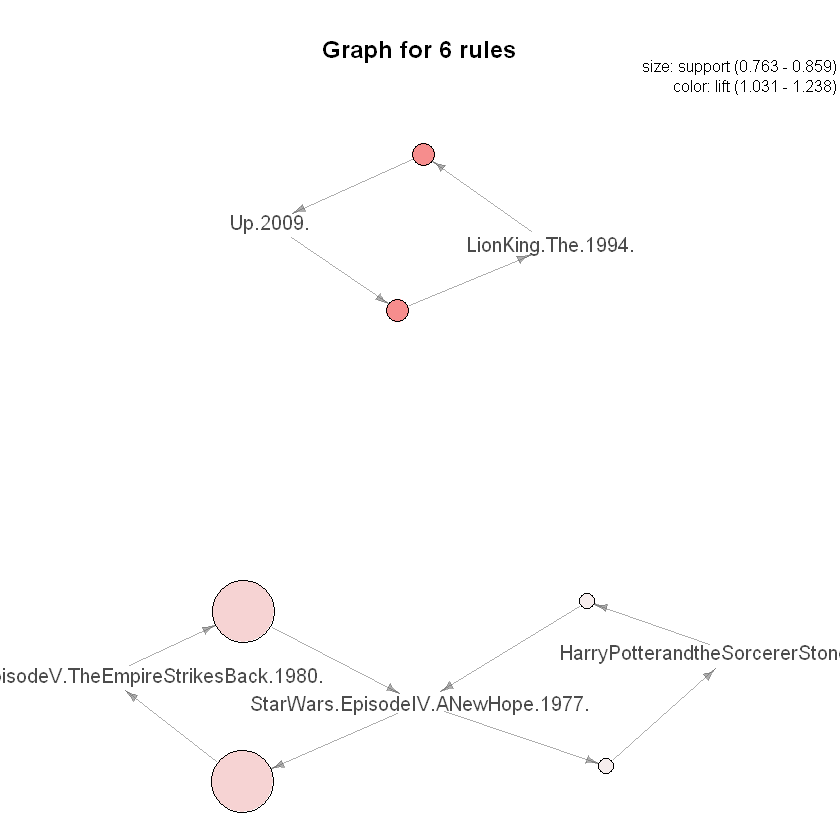

In [23]:
install.packages("arulesViz")
library("arulesViz")
plot(movie_rules, method = "graph", edgeCol = "#5E5E5EFF")
#From the legend, the large circle size means large support rate, deep color means higher lift ratio.
# From the graph, we can see there are three relationships(rules). The Lion King and the Up,a unique relationship,distinct from other two 
# relationships. The other three item connect and contribute two relationships together.
#People who watched StarWars.EpisodeIV.A New Hope are more likely to watch StarWars.EpisodeV.TheEmpireStrikesBack, or people who watched 
#StarWars.EpisodeV.TheEmpireStrikesBack are more likely to watch StarWars.EpisodeIV.A New Hope. 

8. (0.5) Assume you work as data scientist for a streaming platform (for example, Amazon Prime) and that you completed the analysis above to find interesting relationships about the movies that users on the platform watch. What type of actions would you recommend the company to take, based on the results of your analysis?

Firstly, recommend Up( or Lion King) for customers after they finished watching Lion King (or Up). Same for the other high lift ratio relationships. Make it little effort customer need to do, when they are looking for another movie to watch. Secondly, amazon can bundle sell high lift ratio movies together, small 
discount can satisfy customers. This may potentially increase the demand and selling quantity. Thirdly, amazon can increase the price in the high 
lift ratio relationship, when people finished watch the first movie, they eager to watch the whole series, this could potentially increase the profit.

9. (0.7) Run again the Apriori algorithm and find all the association rules with `minsupp = 0.5` and `minconf = 0.5` and containing a minimum of 2 items. For this question, simply copy and paste the code you used to run the apriori algorithm and report only how many rules, in total, the algorithm found.

In [15]:
movie_rule2 <- apriori(movie_watch, parameter = list(supp = 0.5, conf = 0.5, target = "rules", minlen = 2))
#There are 621 Rules found by the algorithm.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 499 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[32 item(s), 999 transaction(s)] done [0.00s].
sorting and recoding items ... [23 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [621 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


10. (0.5) Inspect the rules found in question 9 using an interactive HTML table. Using the HTML table, sort the rules by lift, in increasing order. Report the rule with the lowest lift ratio: how can we interpret the result?

If you get a prompt saying:

> DataTables warning: table id=DataTables_Table_0 - Requested unknown parameter '8' for row 0, column 8. For more information about this error, please see http://datatables.net/tn/4

This is not your fault. There is a bug in the R library. Just click OK and it will disappear. If you are using Safari, you may need to temporarily use Chrome or other browser. Remember to save your notebook before switching browsers.

In [26]:
inspectDT(movie_rule2)

HTML widgets cannot be represented in plain text (need html)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


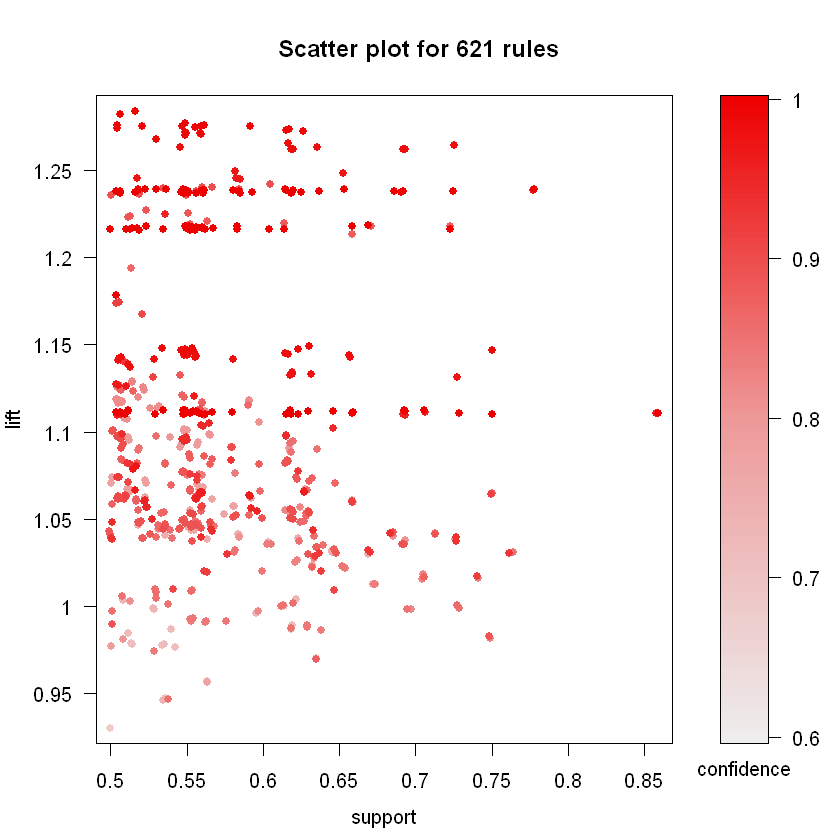

In [27]:
plot(movie_rule2, measure = c("support", "lift"), shading = "confidence")

I think the high ratio of lift which large than 1, and low ratio of lift which less than 1 are both good rules. We can interpret specific relationship
from them, and can use them to improve the customer satisfaction and profit. For example, for high lift ratio, we can simply put those movies together, 
for low lift ratio, we can avoid putting them together.